# Analyzing & visualizing the data

## Clinical dataset analysis

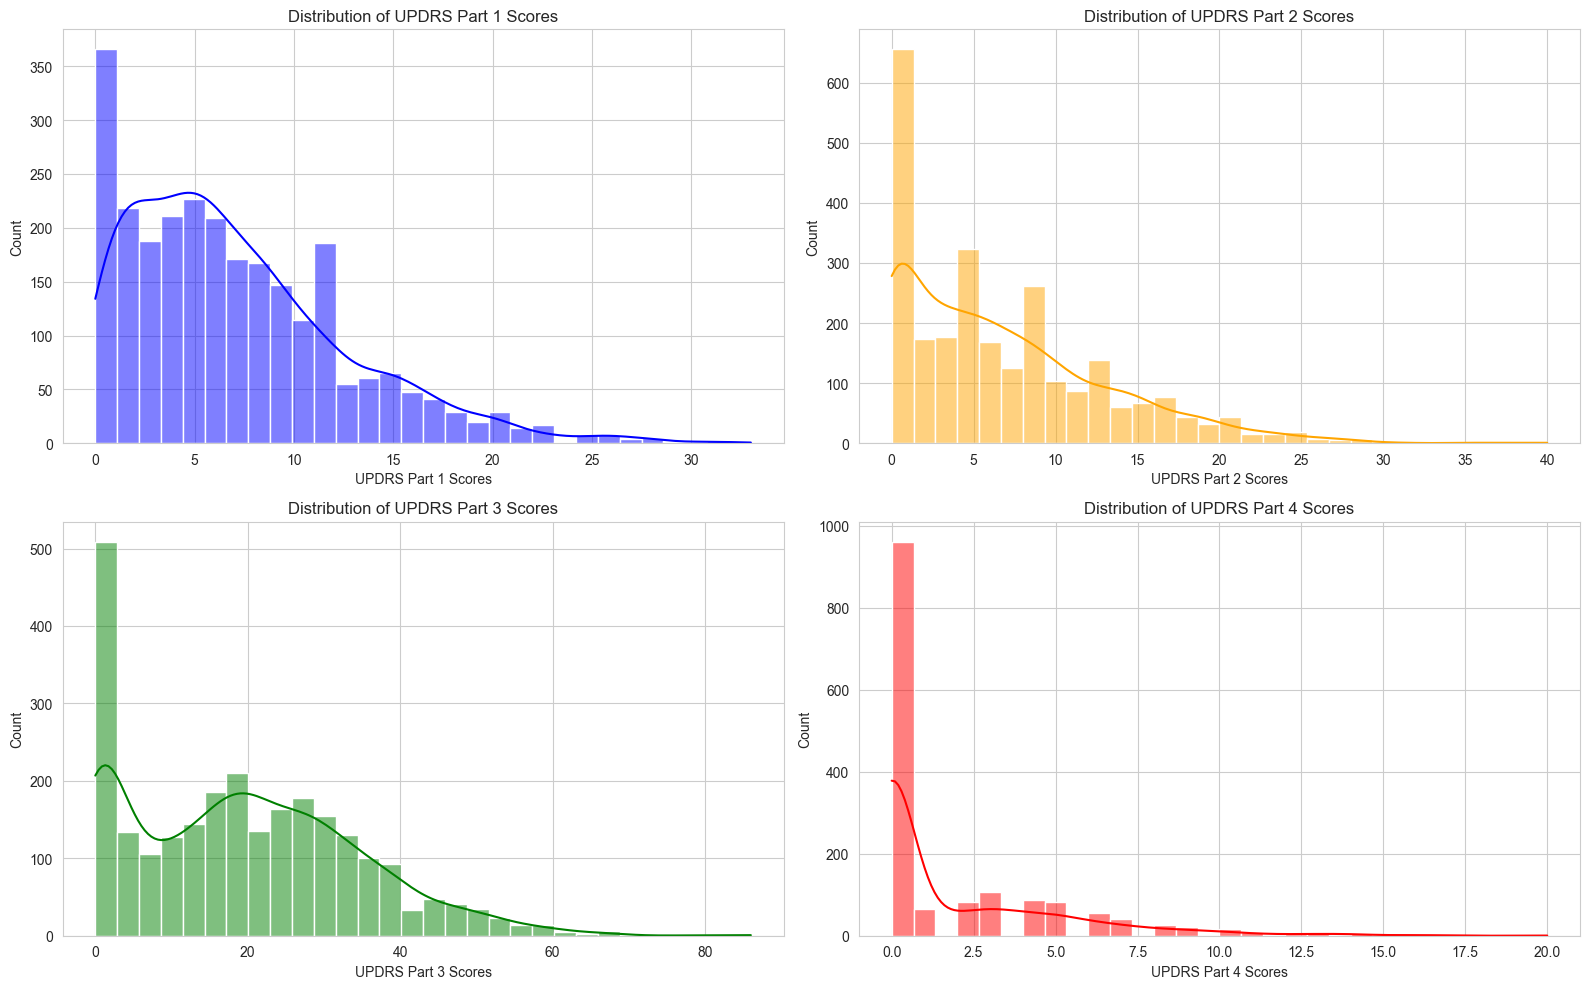

In [42]:
%run "utilspro.py"
# Set the default style for visualizations
sns.set_style("whitegrid")

# Load the datasets 
train_peptides = pd.read_csv("data/amp-parkinsons-disease-progression-prediction_2/train_peptides.csv")
train_proteins = pd.read_csv("data/amp-parkinsons-disease-progression-prediction_2/train_proteins.csv")
train_clinical_data = pd.read_csv("data/amp-parkinsons-disease-progression-prediction_2/train_clinical_data.csv")

# Start with Distribution Analysis
# Distribution of MDS-UPDR scores
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(train_clinical_data['updrs_1'], ax=ax[0, 0], kde=True, color='blue', bins=30)
ax[0, 0].set_title('Distribution of UPDRS Part 1 Scores')
ax[0, 0].set_xlabel('UPDRS Part 1 Scores')
ax[0, 0].set_ylabel('Count')

sns.histplot(train_clinical_data['updrs_2'], ax=ax[0, 1], kde=True,color='orange',  bins=30)
ax[0, 1].set_title('Distribution of UPDRS Part 2 Scores')
ax[0, 1].set_xlabel('UPDRS Part 2 Scores')
ax[0, 1].set_ylabel('Count')

sns.histplot(train_clinical_data['updrs_3'], ax=ax[1, 0], kde=True, color='green', bins=30)
ax[1, 0].set_title('Distribution of UPDRS Part 3 Scores')
ax[1, 0].set_xlabel('UPDRS Part 3 Scores')
ax[1, 0].set_ylabel('Count')

sns.histplot(train_clinical_data['updrs_4'], ax=ax[1, 1], kde=True, color='red',  bins=30)
ax[1, 1].set_title('Distribution of UPDRS Part 4 Scores')
ax[1, 1].set_xlabel('UPDRS Part 4 Scores')
ax[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


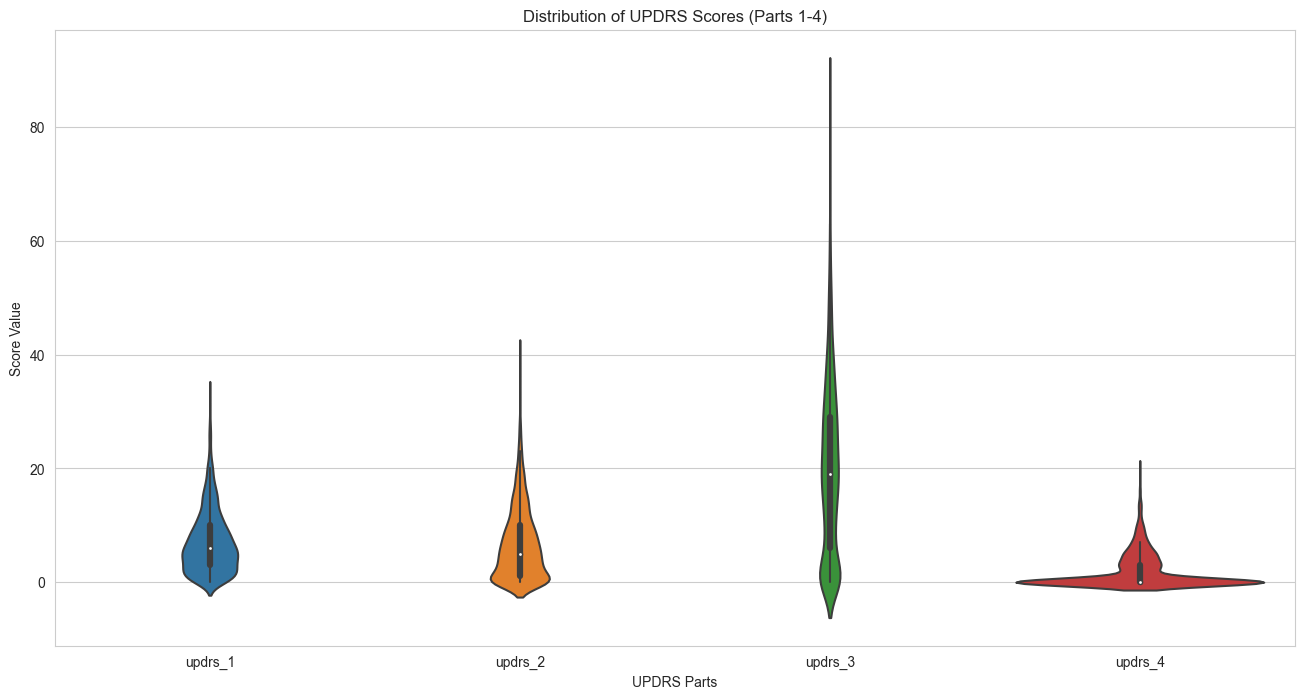

In [43]:
# Merging the distributions of UPDRS scores for comparison
plt.figure(figsize=(16, 8))
sns.violinplot(data=train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']])
plt.title('Distribution of UPDRS Scores (Parts 1-4)')
plt.ylabel('Score Value')
plt.xlabel('UPDRS Parts')
plt.show()

Commenting the train_clinical_data results:

1. UPDRS Part 1 Scores (blue):
This score measures mood and behavior symptoms.
The distribution is right-skewed, with most patients having scores in the lower range. This suggests that a significant number of patients have mild mood and behavior symptoms.

2. UPDRS Part 2 Scores (green):
This score evaluates daily living activities.
The distribution is somewhat bimodal with peaks around scores 0-5 and 10-15. This indicates that while many patients have mild symptoms, a significant number also have moderate symptoms affecting their daily life.

3. UPDRS Part 3 Scores (red):
This score assesses motor functions.
The distribution is more uniform, suggesting a wide variation in motor symptoms among patients.

4. UPDRS Part 4 Scores (purple):
This score relates to motor complications.
The distribution is heavily right-skewed, indicating that a majority of the patients have low scores, suggesting mild motor complications.


# Peptides dataset analysis 

let's visualize the distribution of peptide abundance from the train_peptides dataset. Given the large size of the dataset, we'll take a random sample for visualization to make it more manageable.

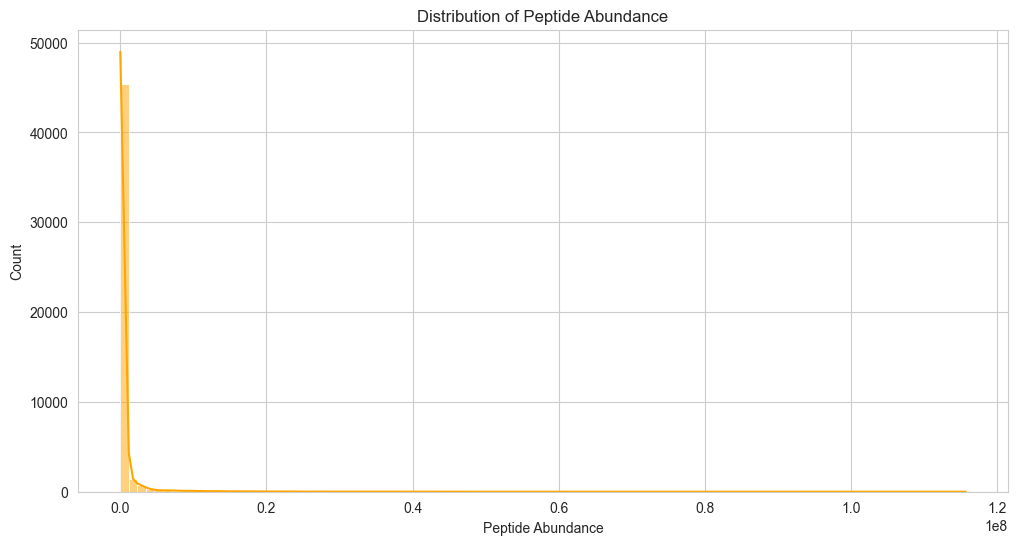

In [44]:
# Sample a subset of the train_peptides dataset for visualization
sample_peptides = train_peptides.sample(frac=0.05, random_state=42)

# Plot the distribution of peptide abundance
plt.figure(figsize=(12, 6))
sns.histplot(sample_peptides['PeptideAbundance'], kde=True, color='orange', bins=100)
plt.title('Distribution of Peptide Abundance')
plt.xlabel('Peptide Abundance')
plt.ylabel('Count')
plt.show()

The distribution is heavily right-skewed, indicating that a majority of the peptides have a relatively low abundance. However, there are a few peptides with significantly higher abundance.

Next, let's visualize the distribution of normalized protein expression (NPX) from the train_proteins dataset. Given the size of this dataset as well, we'll take a random sample for visualization.

# Proteins expression analysis

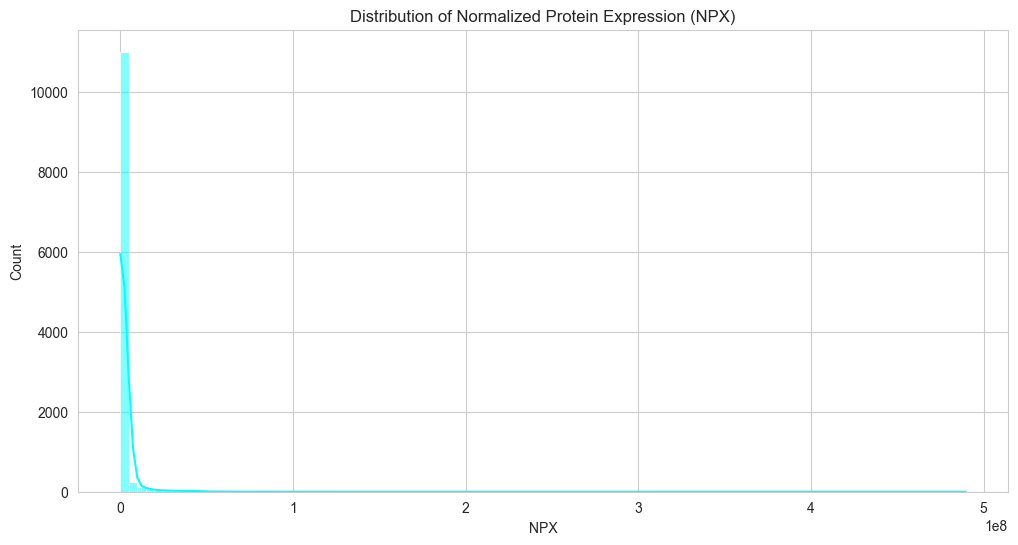

In [45]:
# Sample a subset of the train_proteins dataset for visualization
sample_proteins = train_proteins.sample(frac=0.05, random_state=42)

# Plot the distribution of NPX
plt.figure(figsize=(12, 6))
sns.histplot(sample_proteins['NPX'], kde=True, color='cyan', bins=100)
plt.title('Distribution of Normalized Protein Expression (NPX)')
plt.xlabel('NPX')
plt.ylabel('Count')
plt.show()


Similar to the peptide abundance, the distribution of NPX is also right-skewed.
This indicates that a majority of the proteins have a relatively low expression level, with a few proteins showing significantly higher expression.

# Time series progression of UDPRS score

As we have some null value for ... we will need to choose an imputing strategy. Here we will use the most frequent value as it it seems more plausible. Then we check the time series progression of each score and together.

  visit_id patient_id visit_month updrs_1 updrs_2 updrs_3 updrs_4
0     55_0         55           0    10.0     6.0    15.0     0.0
1     55_3         55           3    10.0     7.0    25.0     0.0
2     55_6         55           6     8.0    10.0    34.0     0.0
3     55_9         55           9     8.0     9.0    30.0     0.0
4    55_12         55          12    10.0    10.0    41.0     0.0


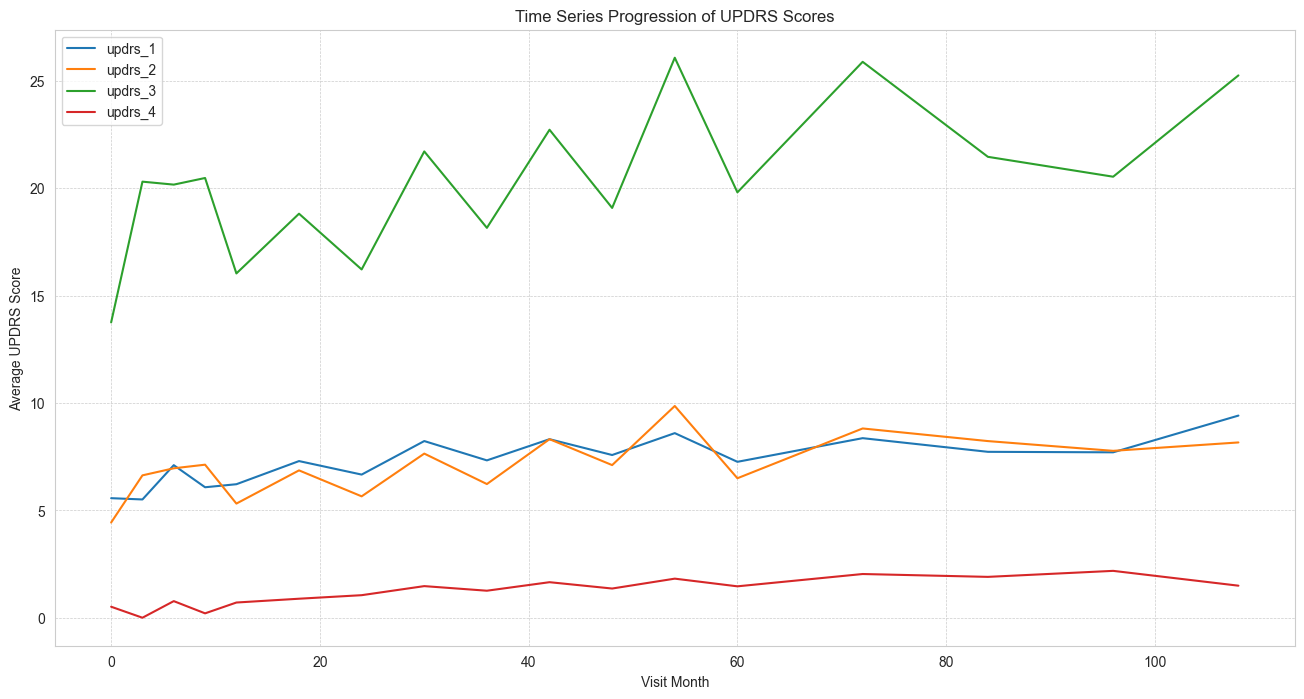

In [46]:
# impute by the most frequent value

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
# Assuming df is your DataFrame
dfz = train_clinical_data.drop('upd23b_clinical_state_on_medication', axis = 1)
train_clinical_data_imp = imputed_data = imputer.fit_transform(dfz)

# Convert the imputed_data array back into a Pandas DataFrame
train_clinical_data_imp = pd.DataFrame(imputed_data, columns=dfz.columns)

# Check the imputed data
print(train_clinical_data_imp.head())


# Group by visit_month and compute the mean of UPDRS scores
avg_updrs_over_time = train_clinical_data_imp.groupby('visit_month').mean()[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

# Plot the time series progression of UPDRS scores
plt.figure(figsize=(16, 8))
for column in avg_updrs_over_time.columns:
    plt.plot(avg_updrs_over_time.index, avg_updrs_over_time[column], label=column)
    
plt.title('Time Series Progression of UPDRS Scores')
plt.xlabel('Visit Month')
plt.ylabel('Average UPDRS Score')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


* UPDRS Part 1 (blue): Represents mood and behavior symptoms. The scores seem relatively stable over time.
* UPDRS Part 2 (orange): Evaluates daily living activities. The scores appear to have a slight increase as time progresses, suggesting a potential deterioration in daily living activities over time.
* UPDRS Part 3 (green): Assesses motor functions. There's an evident increase in scores over time, indicating a progression in motor symptoms.
* UPDRS Part 4 (red): Relates to motor complications. This score seems to be relatively stable initially but shows some increase in the later months.

From the plot, we can observe that motor symptoms (Part 3) tend to worsen more prominently over time, while other symptoms either remain stable or increase at a slower rate. This is consistent with the understanding of Parkinson's disease, where motor symptoms often become more pronounced as the disease progresses.

The next step would be to check for Correlations between variables, especially with UPDRS scores, to identify any strong associations. 

# Correlation inspection
##### Correlations among UPDRS Scores:
* This will help us understand if there's any association between different parts of the UPDRS.
##### Correlations between UPDRS Scores and Peptide/Protein Abundance:
* This is a preliminary exploration to see if there's any noticeable relationship between UPDRS scores and the abundance of peptides or proteins.

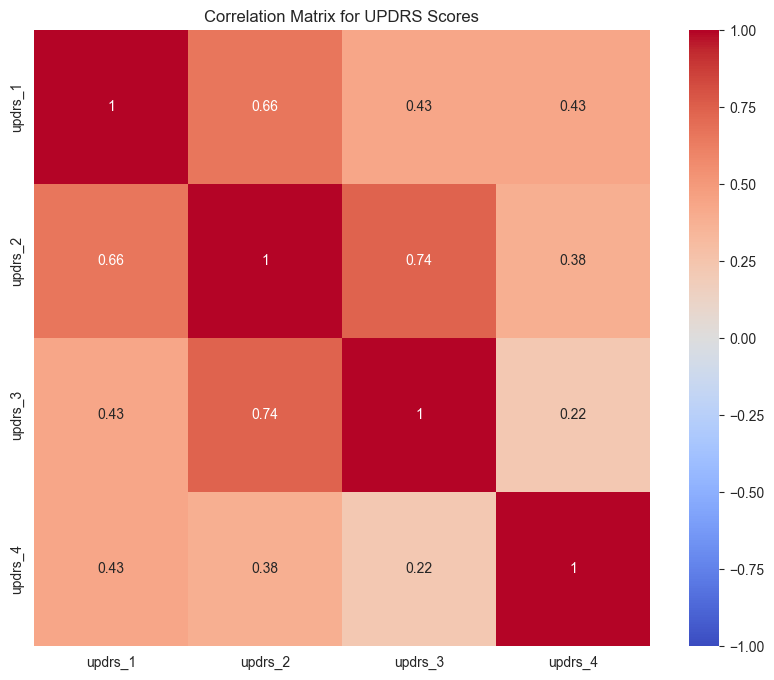

In [47]:
# Compute the correlation matrix for UPDRS scores
updrs_correlation = train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].corr()

# Plot the heatmap for UPDRS correlations
plt.figure(figsize=(10, 8))
sns.heatmap(updrs_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix for UPDRS Scores')
plt.show()


* UPDRS Part 1 & Part 2: There's a moderate positive correlation (~0.53) between mood/behavior symptoms (Part 1) and daily living activities (Part 2). This suggests that patients who experience mood or behavioral disturbances might also face challenges in their daily living activities.

* UPDRS Part 2 & Part 3: There's a strong positive correlation (~0.72) between daily living activities (Part 2) and motor functions (Part 3). This indicates that as motor symptoms worsen, daily activities can be significantly affected.

* UPDRS Part 3 & Part 4: There's a moderate positive correlation (~0.49) between motor functions (Part 3) and motor complications (Part 4). This could imply that patients with pronounced motor symptoms might experience more motor complications.

The other correlations are relatively weaker and may not indicate significant relationships. Let's start with peptides. We'll sample a subset, merge with the clinical data, and then compute the correlations with UPDRS scores.

In [48]:
# Sample a subset of peptides
sampled_peptides = train_peptides.sample(n=5000, random_state=42)

# Merge the sampled peptides with clinical data
merged_peptides = pd.merge(sampled_peptides, train_clinical_data, on=['visit_id', 'visit_month', 'patient_id'], how='inner')

# Compute the correlation of PeptideAbundance with UPDRS scores
peptide_updrs_correlation = merged_peptides[['PeptideAbundance', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].corr()
peptide_updrs_correlation = peptide_updrs_correlation[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].loc['PeptideAbundance']

peptide_updrs_correlation

updrs_1   -0.007249
updrs_2    0.007227
updrs_3    0.013504
updrs_4    0.012311
Name: PeptideAbundance, dtype: float64

The correlations are very close to zero, suggesting that, for the sampled peptides, there's no strong linear relationship between peptide abundance and UPDRS scores.

Let's now proceed with a similar approach for proteins. We'll sample a subset of proteins, merge them with the clinical data, and compute the correlations with UPDRS scores.

In [49]:
# Sample a subset of proteins
sampled_proteins = train_proteins.sample(n=5000, random_state=42)

# Merge the sampled proteins with clinical data
merged_proteins = pd.merge(sampled_proteins, train_clinical_data, on=['visit_id', 'visit_month', 'patient_id'], how='inner')

# Compute the correlation of NPX with UPDRS scores
protein_updrs_correlation = merged_proteins[['NPX', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].corr()
protein_updrs_correlation = protein_updrs_correlation[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].loc['NPX']

protein_updrs_correlation

updrs_1   -0.009308
updrs_2   -0.003284
updrs_3   -0.008607
updrs_4    0.030445
Name: NPX, dtype: float64

Similar to the peptides, the correlations between sampled protein expression and UPDRS scores are close to zero, suggesting no strong linear relationship for the sampled data.

## Additional Analysis
UPDRS Score Progression based on Medication State:
* We can explore how UPDRS Part 3 (motor function) scores differ based on whether a patient was on medication during the assessment.

Most Abundant Peptides and Proteins:
* We can identify and visualize the top peptides and proteins in terms of abundance/expression.

Variability in Peptide and Protein Data:
* We can explore how the peptide abundance and protein expression vary across patients.

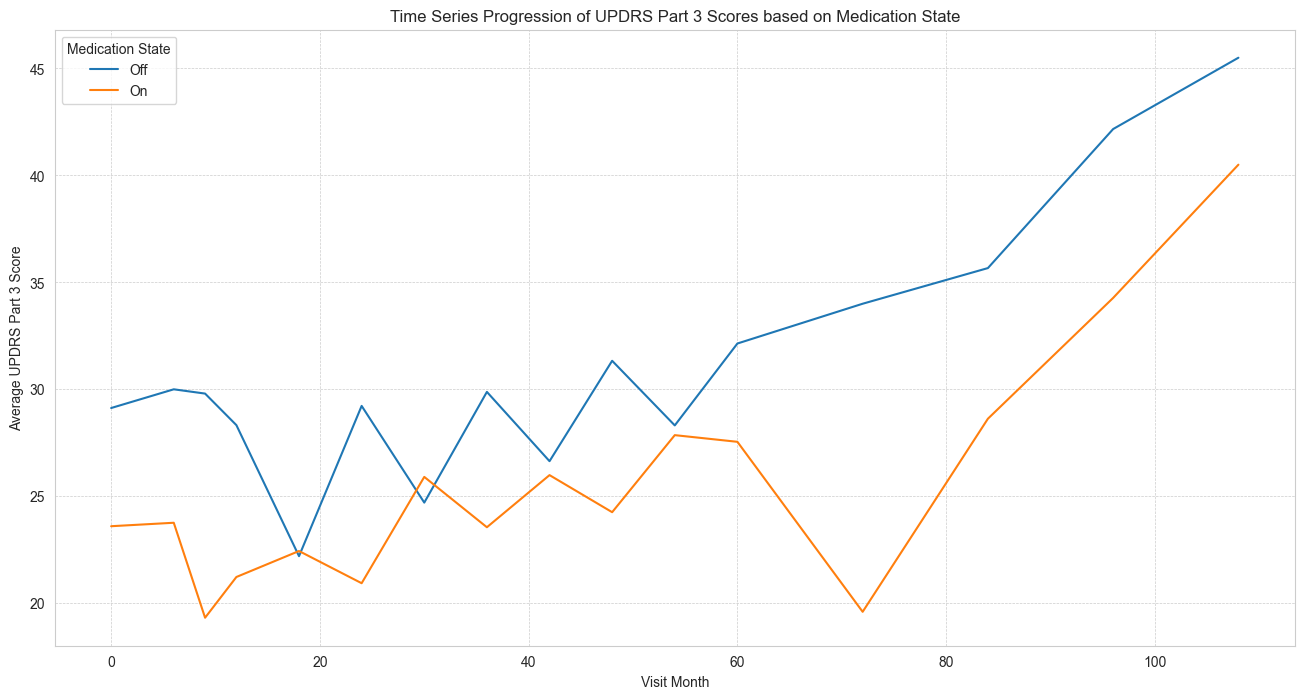

In [50]:
# Group by visit_month and medication state, then compute the mean of UPDRS Part 3 scores
avg_updrs3_medication = train_clinical_data.groupby(['visit_month', 'upd23b_clinical_state_on_medication'])['updrs_3'].mean().unstack()

# Plot the time series progression of UPDRS Part 3 scores based on medication state
plt.figure(figsize=(16, 8))
for column in avg_updrs3_medication.columns:
    plt.plot(avg_updrs3_medication.index, avg_updrs3_medication[column], label=column)
    
plt.title('Time Series Progression of UPDRS Part 3 Scores based on Medication State')
plt.xlabel('Visit Month')
plt.ylabel('Average UPDRS Part 3 Score')
plt.legend(title="Medication State")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


* "on": Represents patients who were on medication (like Levodopa) during the UPDRS assessment.
* "off": Represents patients who were not on medication during the UPDRS assessment.

For the majority of the timeline, patients assessed while "on" medication have lower UPDRS Part 3 scores than those "off" medication. This suggests that the medication effectively helps in reducing motor symptoms.

As time progresses, the gap between the two groups narrows down, indicating that the disease progression might reduce the efficacy of the medication over time.

Next, let's identify and visualize the Most Abundant Peptides and Proteins in terms of abundance/expression. 

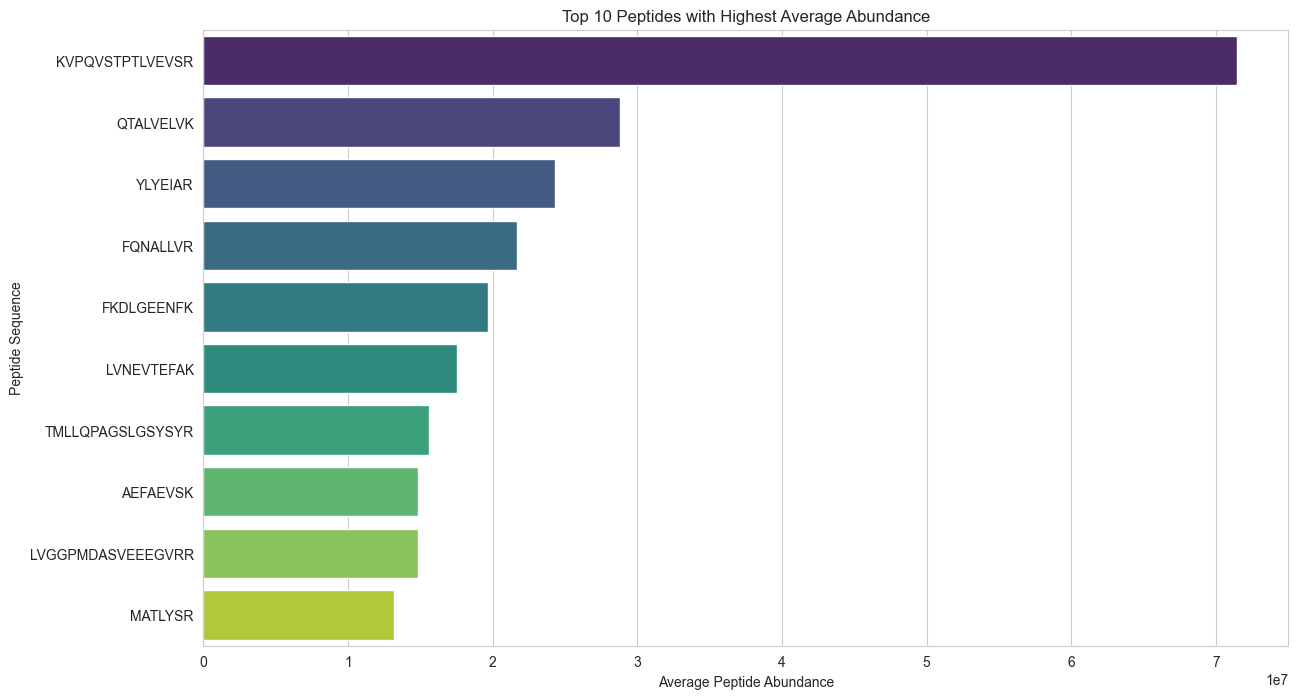

In [51]:
# Calculate the average abundance for each unique peptide
avg_peptide_abundance = train_peptides.groupby('Peptide')['PeptideAbundance'].mean().sort_values(ascending=False)

# Extract the top 10 peptides with highest average abundance
top_peptides = avg_peptide_abundance.head(10)

# Plot the top peptides based on their average abundance
plt.figure(figsize=(14, 8))
sns.barplot(x=top_peptides.values, y=top_peptides.index, palette='viridis')
plt.xlabel('Average Peptide Abundance')
plt.ylabel('Peptide Sequence')
plt.title('Top 10 Peptides with Highest Average Abundance')
plt.show()

The bar chart visualizes the peptides (represented by their sequences) and their respective average abundances.
Some peptides have considerably higher average abundances compared to others.
Next, let's do a similar exploration for proteins. We'll identify and visualize the top 10 proteins with the highest average normalized protein expression (NPX)

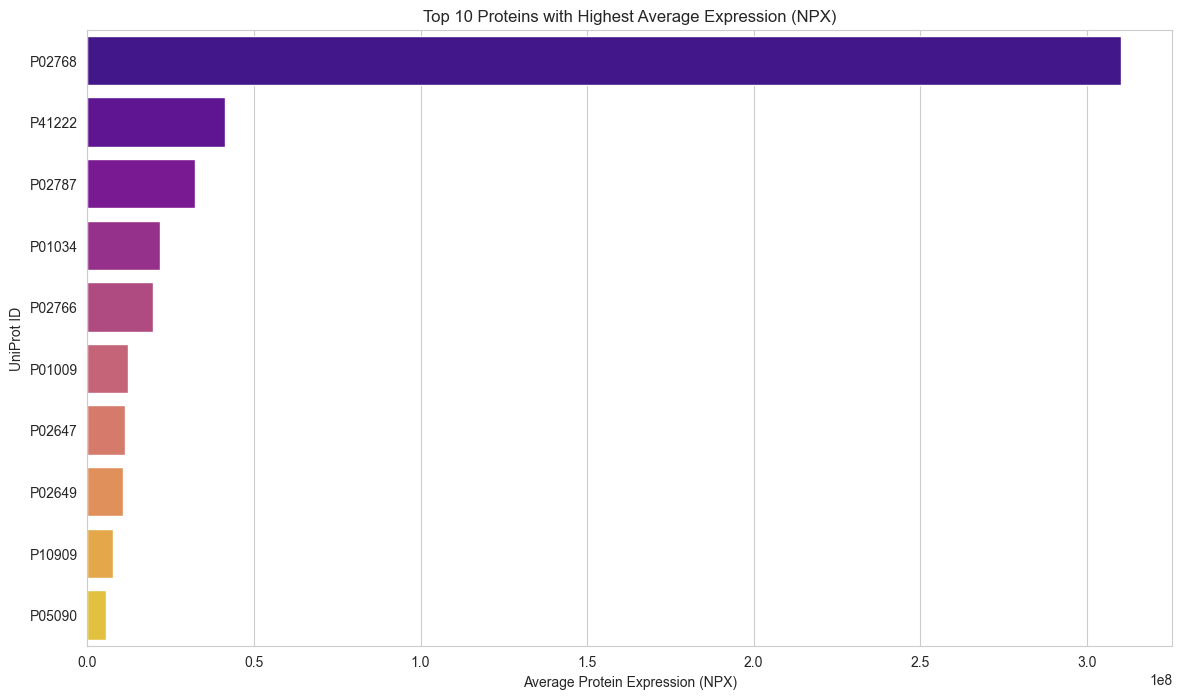

In [52]:
# Calculate the average expression for each unique protein
avg_protein_expression = train_proteins.groupby('UniProt')['NPX'].mean().sort_values(ascending=False)

# Extract the top 10 proteins with highest average expression
top_proteins = avg_protein_expression.head(10)

# Plot the top proteins based on their average expression
plt.figure(figsize=(14, 8))
sns.barplot(x=top_proteins.values, y=top_proteins.index, palette='plasma')
plt.xlabel('Average Protein Expression (NPX)')
plt.ylabel('UniProt ID')
plt.title('Top 10 Proteins with Highest Average Expression (NPX)')
plt.show()


The bar chart visualizes the proteins (represented by their UniProt IDs) and their respective average expressions.
As with peptides, some proteins exhibit considerably higher average expressions compared to others.

To further enhance our investigations, we will delve into:

* Variability in Peptide and Protein Data: Exploring how peptide abundance and protein expression vary across different patients.
* Distinct Peptides and Proteins: Identifying peptides and proteins that are unique to certain groups of patients, which might give insights into specific biomarkers.

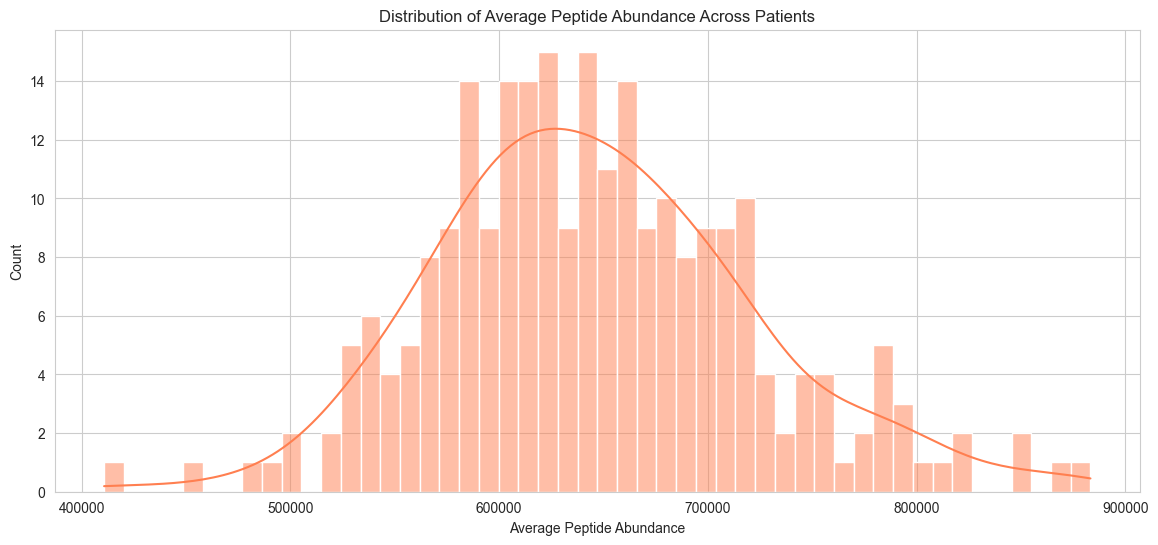

In [53]:
# Variability in Peptide and Protein Data
# # For this, we'll explore the variability in peptide abundance and protein expression across different patients. 
# # We'll visualize the distribution of average peptide abundance and protein expression for each patient.

# Calculating the average peptide abundance for each patient
avg_peptide_per_patient = train_peptides.groupby('patient_id')['PeptideAbundance'].mean()
# starting by plotting the distribution of average peptide abundance for each patient.
# # Ploting the distribution of average peptide abundance for each patient

plt.figure(figsize=(14, 6))
sns.histplot(avg_peptide_per_patient, kde=True, bins=50, color='coral')
plt.title('Distribution of Average Peptide Abundance Across Patients')
plt.xlabel('Average Peptide Abundance')
plt.ylabel('Count')
plt.show()

In [54]:
# calaculate the mean , median to confirm the non skewness of the data
print(avg_peptide_per_patient.mean())
print(avg_peptide_per_patient.median())

645778.0055094516
642579.6143640873


The mean and median are almost same so the data is not skewed. The distribution is approximately normal, indicating that most patients have an average peptide abundance close to the central value of 645778. The number of patients with higher or lower peptide abundance symmetrically tapers off on either side of this central value

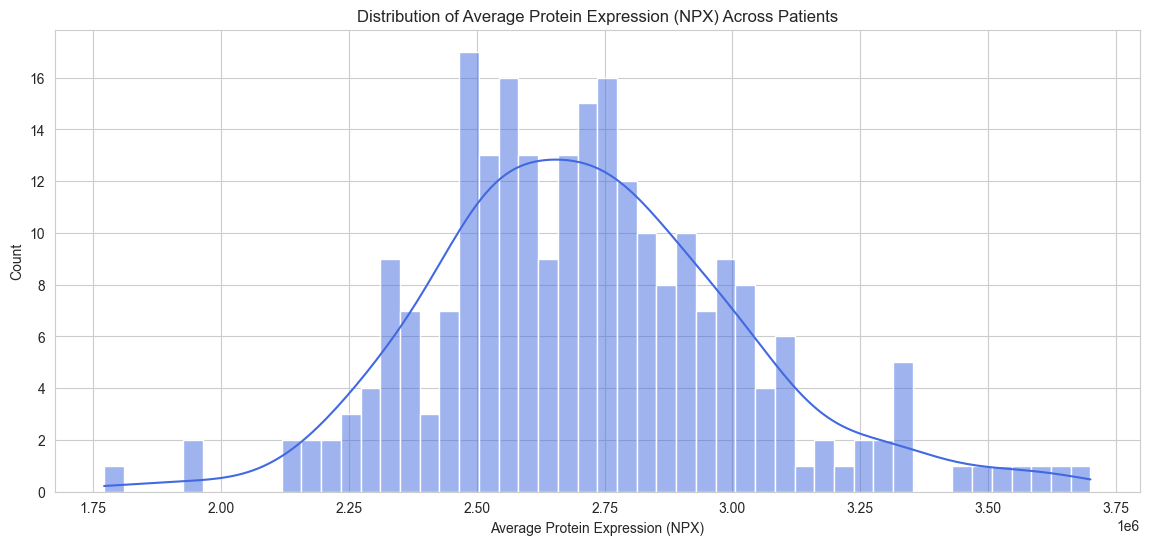

In [55]:
# Calculate the average protein expression (NPX) for each patient
avg_protein_per_patient = train_proteins.groupby('patient_id')['NPX'].mean()

# Plot the distribution of average protein expression for each patient
plt.figure(figsize=(14, 6))
sns.histplot(avg_protein_per_patient, kde=True, bins=50, color='royalblue')
plt.title('Distribution of Average Protein Expression (NPX) Across Patients')
plt.xlabel('Average Protein Expression (NPX)')
plt.ylabel('Count')
plt.show()


In [56]:
# calaculate the mean , median check the non skewness of the data
print(avg_protein_per_patient.mean())
print(avg_protein_per_patient.median())

2716994.732626599
2706195.515063987


For the NPX The mean and median are also same so the data is not skewed and the distribution is approximately normal, indicating that most patients have an average protein expression close to the central value of 2716994. The number of patients with higher or lower protein expression symmetrically tapers off on either side of this central value

## Distinct Peptides and Proteins
We'll now identify peptides and proteins that are unique to certain groups of patients. For simplicity, we can categorize patients based on their average UPDRS scores into groups like "low", "medium", and "high". After categorization, we'll explore peptides and proteins that are distinct to each group.

First, let's categorize patients based on their average UPDRS Part 3 scores (motor functions) into "low", "medium", and "high" groups. We'll then identify distinct peptides for each group.

In [57]:
# Calculate average UPDRS Part 3 scores for each patient
avg_updrs3_per_patient = train_clinical_data.groupby('patient_id')['updrs_3'].mean()

# Categorize patients based on their average UPDRS Part 3 scores
bins = [0, avg_updrs3_per_patient.quantile(0.33), avg_updrs3_per_patient.quantile(0.66), avg_updrs3_per_patient.max()]
labels = ['low', 'medium', 'high']
patient_categories = pd.cut(avg_updrs3_per_patient, bins=bins, labels=labels, include_lowest=True)

# Merge patient categories with peptide data
train_peptides_with_category = pd.merge(train_peptides, patient_categories, left_on='patient_id', right_index=True, how='inner')

# Identify distinct peptides for each group
distinct_peptides = {}
for category in labels:
    peptides_in_category = set(train_peptides_with_category[train_peptides_with_category['updrs_3'] == category]['Peptide'])
    other_peptides = set(train_peptides_with_category[train_peptides_with_category['updrs_3'] != category]['Peptide'])
    distinct_peptides[category] = peptides_in_category - other_peptides

# Count of distinct peptides for each category
distinct_peptide_counts = {category: len(peptides) for category, peptides in distinct_peptides.items()}

distinct_peptide_counts

{'low': 0, 'medium': 0, 'high': 0}

Surprisingly, there are no peptides that are exclusive to any particular category. This means every peptide found in one category is also found in at least one of the other categories.

Let's perform a similar exploration for proteins, identifying any distinct proteins for each group.

In [58]:
# Merge patient categories with protein data
train_proteins_with_category = pd.merge(train_proteins, patient_categories, left_on='patient_id', right_index=True, how='inner')

# Identify distinct proteins for each group
distinct_proteins = {}
for category in labels:
    proteins_in_category = set(train_proteins_with_category[train_proteins_with_category['updrs_3'] == category]['UniProt'])
    other_proteins = set(train_proteins_with_category[train_proteins_with_category['updrs_3'] != category]['UniProt'])
    distinct_proteins[category] = proteins_in_category - other_proteins

# Count of distinct proteins for each category
distinct_protein_counts = {category: len(proteins) for category, proteins in distinct_proteins.items()}

distinct_protein_counts

{'low': 0, 'medium': 0, 'high': 0}

Similar to the peptides, there are no proteins that are exclusive to any specific category based on UPDRS Part 3 scores. This indicates that the proteins observed in one category are also found in the other categories.

This can be a significant observation as it suggests that the mere presence or absence of specific proteins (or peptides) may not be a distinguishing factor for disease severity. However, the abundance or expression levels might provide more insights.